In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from itertools import product
import numpy as np

### MAPA DE CALOR

Los **mapas de calor** son deseables para mostrar datos que depende de 2 variables distintas donde el nivel de intensidad del color representa el valor numérico que tiene asignado y esto representado a travez de una tabla o matriz.

En Matplolib usamos el método imshow().

En el siguiente ejemplo explicamos la cosecha de vegetales por tonelada por cada granjero

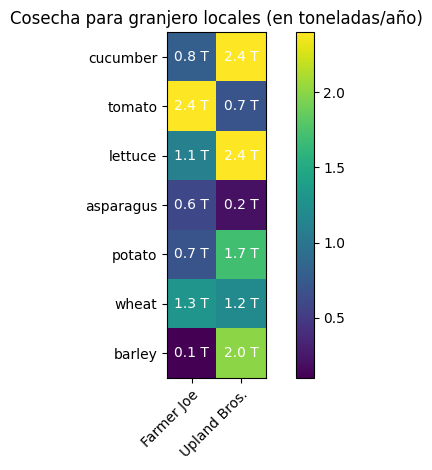

In [ ]:
#Creamos una lista de vegetales
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]

#Creamos una lista de granjeros
farmers = ["Farmer Joe", "Upland Bros."]

#Creamos una matriz de 2D usando numpy, donde tenemos las cosechas.
Cosecha = np.array([[0.8, 2.4],
                    [2.4, 0.7],
                    [1.1, 2.4],
                    [0.6, 0.2],
                    [0.7, 1.7],
                    [1.3, 1.2],
                    [0.1, 2.0]])

#Esto inicializa una figura y un eje para trabajar con Matplotlib.
fig, ax = plt.subplots()

#La función imshow genera el mapa de calor usando la matriz Cosecha. Cada celda se colorea según el valor correspondiente en la matriz.
# Por defecto, utiliza un gradiente de color donde los valores más pequeños tienen colores más claros y los valores más grandes tienen colores más oscuros.

im = ax.imshow(Cosecha)

#Se establecen las etiquetas del eje X con los nombres de los granjeros. Se rota el texto 45 grados para que sea más legible.
ax.set_xticks(range(len(farmers)), labels=farmers,
              rotation=45, ha="right", rotation_mode="anchor")
#Se establecen las etiquetas del eje Y con los nombres de los vegetales.
ax.set_yticks(range(len(vegetables)), labels=vegetables)

#Este fragmento utilizaremos dos bucles for anidados para recorrer la matriz Cosecha. El primer bucle (i) recorre las filas (vegetales) 
#y el segundo (j) recorre las columnas (granjeros). En cada celda del mapa de calor, colocamos el valor correspondiente de la matriz Cosecha como texto.
#Esto permite visualizar no solo los colores, sino también los números exactos de la cosecha.

for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, f'{Cosecha[i, j]} T',
                       ha="center", va="center", color="w")

#Se asigna un título que describe el propósito del gráfico.
ax.set_title("Cosecha para granjero locales (en toneladas/año)")

#Se ajusta el diseño para que los elementos
fig.tight_layout()
#Se añade una barra de colores que muestra la escala de valores usada en el mapa de calor, lo cual facilita la interpretación de los colores.
plt.colorbar(im)


### Ejercicio: Graficar un Mapa de Calor

Para este ejercicio, generaremos un **Mapa de Calor** utilizando las siguientes variables:

- **Carrera:** Representa la categoría principal para agrupar los datos.
- **Sexo:** Diferencia los datos según el género.
- **Edad:** Se calculará el promedio de la edad por carrera y género.

#### Pasos a seguir:
1. **Calcular el promedio de la edad**:  
   - Agrupar los datos por **carrera** y **sexo**.
   - Calcular el promedio de la edad en cada combinación.

2. **Filtrar los datos**:  
   - Asegurarse de trabajar únicamente con datos relevantes y consistentes.

3. **Graficar el Mapa de Calor**:  
   - Usar los datos filtrados para crear el gráfico.
   - Representar los valores promedio de edad con un gradiente de colores que destaque las diferencias.

#### Resultado esperado:
El Mapa de Calor mostrará las variaciones en la edad promedio por carrera y género, permitiendo identificar patrones o tendencias clave.



In [ ]:
df_modalidad_virtual = pd.read_csv("data/ModalidadVirtual.csv")
df_modalidad_virtual.head()

#Agrupamos los datos por la carrera y sexo y usamos el campo edad para calcular el promedio por cada uno.

df_carrera_genero_promedio = df_modalidad_virtual.groupby(["carrera","sexo"])["edad"].mean().reset_index()
df_carrera_genero_promedio.head()

,carrera,sexo,edad
0,Administración de Empresas,Hombre,25.750000
1,Administración de Empresas,Mujer,25.000000
2,Artes Plásticas,Hombre,30.000000
3,Ciencias Físicas y Energías Alternativas,Hombre,26.166667
4,Ciencias Físicas y Energías Alternativas,Mujer,27.500000


### Completar Datos Faltantes en el DataFrame


Si revisamos los datos, vamos a encontrar que:

- Algunas **carreras** tienen ambos tipos de género.
- Otras **carreras** tienen solo un tipo de género.

Para resolver esto, completaremos los datos faltantes asignando una edad de `0` a los casos en los que no existan registros.


1. **Crearemos 2 listas:**
    - **carreras:** Obtenemos todas las carreras unicas  
    - **genero:** generamos una lista con los 2 tipos de genero  

2. **Generamos un Dataframe:**: 
    - Creamos un nuevo dataframe combinando ambas listas.  

3. **Fusionar los datos:**
    - Hacemos un merge entre la lista_filtrada, y esta nueva lista  

4. **Completar valores faltantes:**
    - Un vez hecho esto ya tenemos todas las carreras con ambos tipos de genero y con su edad promedia asignada, pero los que no tienen saldran con valor Nan,  asi que para ello le aplicalos la funcion `fillna(0)`, Con esto llenamos los campos vacios con la edad 0.
    

In [4]:
carreras = df_carrera_genero_promedio["carrera"].unique()
genero = ["Hombre", "Mujer"]

combinar = pd.DataFrame(list(product(carreras, genero)), columns=["carrera", "sexo"])

df_carrera_genero = combinar.merge(df_carrera_genero_promedio, on=["carrera","sexo"], how="left")

#llenar campos vacios con 0 en la columna edad
df_carrera_genero = df_carrera_genero.fillna(0)
df_carrera_genero.head()

,carrera,sexo,edad
0,Administración de Empresas,Hombre,25.750000
1,Administración de Empresas,Mujer,25.000000
2,Artes Plásticas,Hombre,30.000000
3,Artes Plásticas,Mujer,0.000000
4,Ciencias Físicas y Energías Alternativas,Hombre,26.166667


#### Consideraciones:
- La lógica es prácticamente la misma que revisamos anteriormente.
- Solo se reemplazan las variables por las nuevas obtenidas tras la limpieza de los datos.



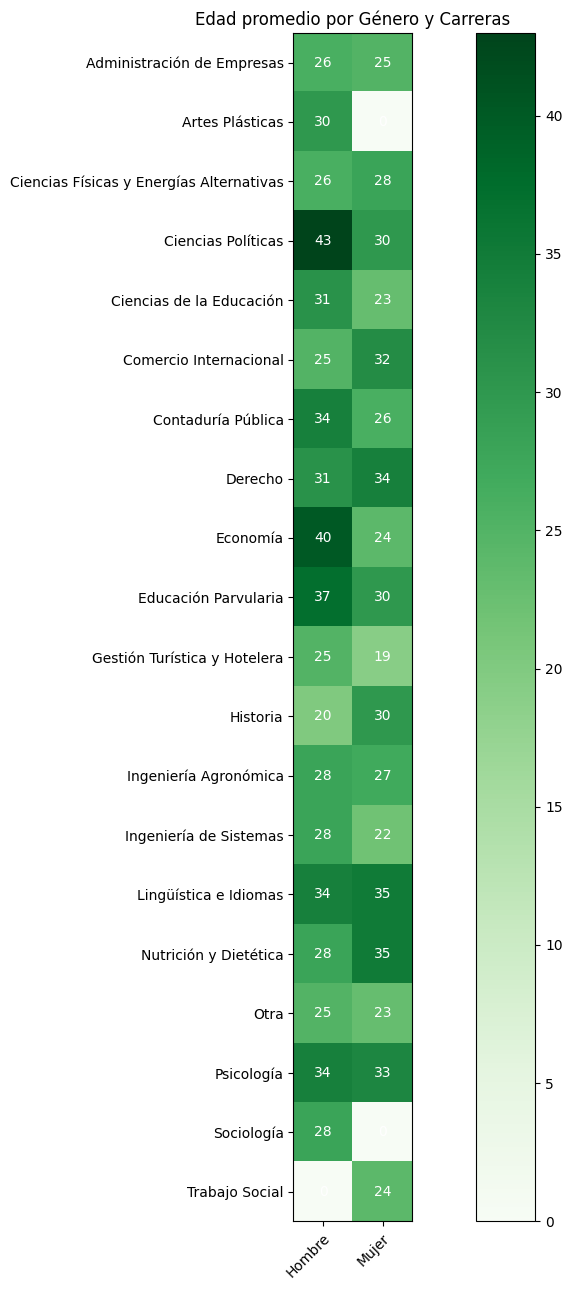

In [18]:
carrera = list(df_carrera_genero["carrera"].unique())
genero = list(df_carrera_genero["sexo"].unique())
edad = np.array(round(df_carrera_genero["edad"])).reshape(-1, 2)


fig, ax = plt.subplots(figsize=(13, 13))
im = ax.imshow(edad, cmap="Greens")


ax.set_xticks(range(len(genero)), labels=genero,
              rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(carrera)), labels=carrera)

for i in range(len(carrera)):
    for j in range(len(genero)):
        text = ax.text(j, i, int(edad[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Edad promedio por Género y Carreras")
fig.tight_layout()
plt.colorbar(im)
plt.show()




### Mapa de calor - HORIZONTAL

En el ejercicio anterior vemos que en el eje x se está colocando los generos y en el eje y las carreras.
Ahora si queremos realizar el grafico de manera horizontal, es decir cambiando los valores en los ejes.

Para ello podemos aplicar el siguiente codigo:

edad = edad.T

Con esto podemos transponer los datos para que los vegetales salgan en el ejeX.

Adicional a ello demos cambiar las variales en:

- ax.set_xticks()
- ax.set_yticks()
- for anidado

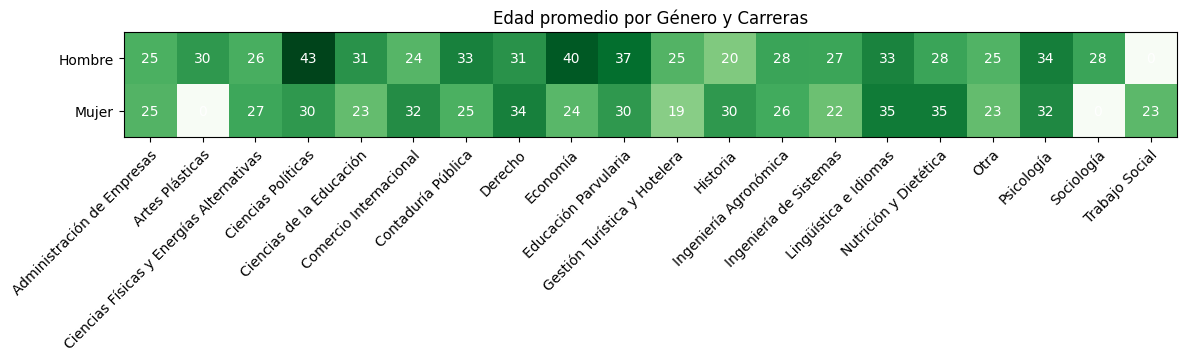

In [19]:
carrera = list(df_carrera_genero["carrera"].unique())
genero = list(df_carrera_genero["sexo"].unique())
edad = np.array(round(df_carrera_genero["edad"],2)).reshape(-1, 2)

edad = edad.T 

fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(edad, cmap="Greens")


ax.set_xticks(range(len(carrera)), labels=carrera, rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(genero)), labels=genero)


for i in range(len(genero)):
    for j in range(len(carrera)):
        text = ax.text(j, i, int(edad[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Edad promedio por Género y Carreras")
fig.tight_layout() 
plt.show()

